In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('student.csv')
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
y = data['Hours'].values
x = data['Scores'].values

In [3]:
data = pd.read_csv('student.csv')
print(data.shape)

(25, 2)


In [4]:
data.isnull().values.any()

False

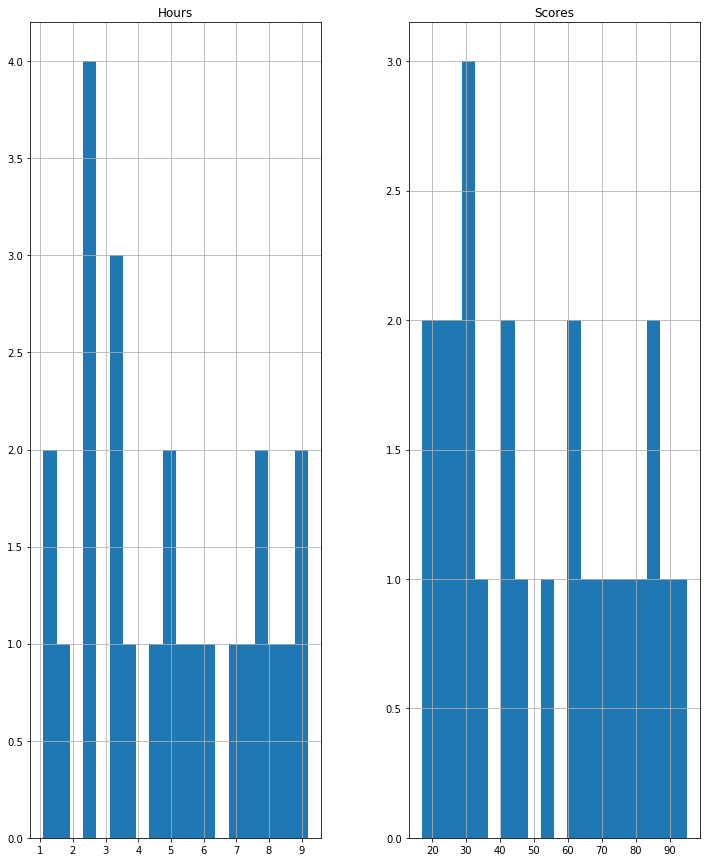

In [5]:
data.hist(bins=20,figsize=(12,15))
plt.show()

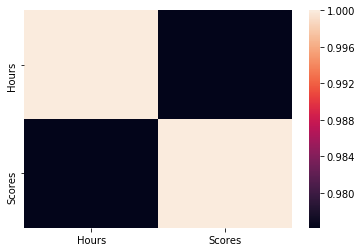

In [6]:
sns.heatmap(data.corr())


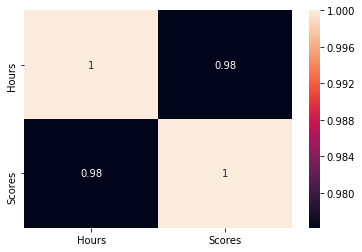

In [7]:
sns.heatmap(data.corr(), annot=True)

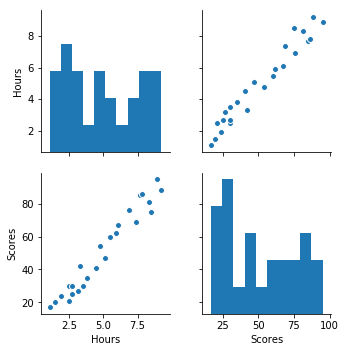

In [8]:
sns.pairplot(data)

<Figure size 1008x720 with 0 Axes>

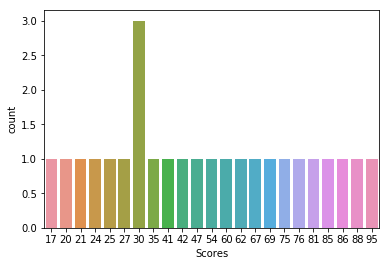

<Figure size 1008x720 with 0 Axes>

In [9]:
sns.countplot(data['Scores'],label="Hours")
plt.figure(figsize=(14,10))

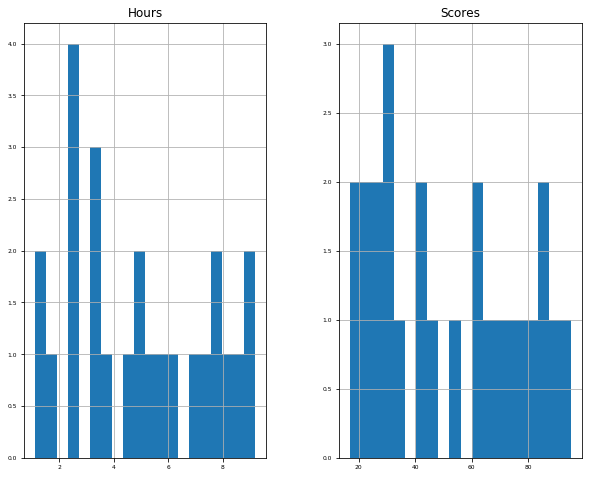

In [10]:
data[['Scores', "Hours",]].hist(figsize=(10, 8), bins=20, xlabelsize=6, ylabelsize=6);

In [11]:
y_mean = np.average(y)
std_dev_y = np.std(y)

x_mean = np.average(x)
std_dev_x = np.std(x)

In [12]:
print("x_mean = %.2f, y_mean = %.2f, std_dev(x) = %.2f, std_dev(y) = %.2f"%(x_mean, y_mean, std_dev_x, std_dev_y))

x_mean = 51.48, y_mean = 5.01, std_dev(x) = 24.78, std_dev(y) = 2.47


In [13]:
corr = np.corrcoef(x,y)[1,0]

print("Correlation coeffcient: %.4f"%(corr))

Correlation coeffcient: 0.9762


In [14]:
theta_1 = corr * std_dev_y / std_dev_x
theta_1

theta_0 = y_mean - (theta_1 * x_mean)
theta_0

-0.006285578747629472

In [15]:
x_d = np.linspace(np.min(x), np.max(x), 100)
y_d = theta_0 + theta_1 * x_d

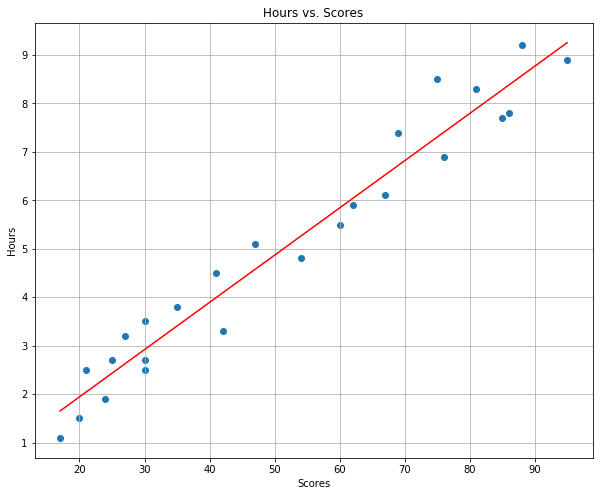

In [16]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Hours vs. Scores")
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.plot(x_d, y_d, color = 'r')
plt.grid()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
x1 = x
x2 = np.square(x)

In [19]:
X = np.vstack((x1,x2)).T
X.shape

(25, 2)

In [20]:
model = LinearRegression().fit(X,y)

In [21]:
th_0 = model.intercept_
th_0

-0.3531536019200434

In [22]:
th_1 = model.coef_
th_1

array([ 0.11371203, -0.00014974])

In [23]:
x1_data = np.linspace(np.min(x), np.max(x), 100)
x2_data = np.square(x1_data)

ym_data = th_0 + th_1[0] * x1_data + th_1[1]*x2_data

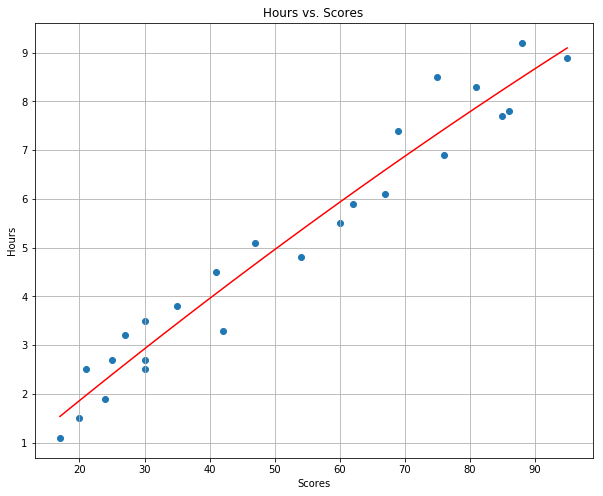

In [24]:
fig = plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.title("Hours vs. Scores")
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.plot(x1_data, ym_data, color = 'r')
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [25]:
x1 = x
x2 = x*x

w = th_0 + th_1[0] * x1 + th_1[1]*x2

print("Predicted Scores = {}".format(w))

Predicted Scores = [1.96876578 4.66054672 2.60791421 7.33298814 2.92344558 1.86119289
 8.49395566 5.93052145 7.87510818 2.39606262 8.23053214 6.12141012
 4.05733472 4.15861873 1.53667741 9.0981291  2.92344558 2.28968761
 6.59339107 6.78008716 2.92344558 5.35066814 3.44334179 7.42409015
 8.31863945]


In [26]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


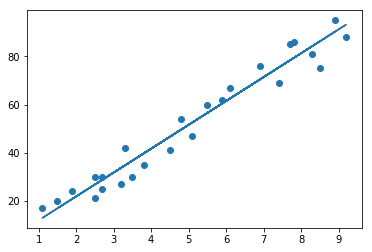

In [29]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [30]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [44]:
 #Fit the linear Regression Model
LinReg= LinearRegression(normalize=True)
LinReg.fit(X_train,y_train)

#Predict the value for new, unseen data
lin_pred = LinReg.predict(X_test)

# Find Accuracy using score method
LinReg_accuracy =round(LinReg.score(X_train,y_train)*100,2)


In [33]:
Model_Comparison = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Score': [LinReg_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,95.16,Linear Regression


In [34]:
# You can also test with your own data
##Hours= 9.25
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours = [[9.25]]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [36]:
df=pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference(%)': abs((y_pred-y_test)/y_test*100) })
df

,Actual,Predicted,Difference(%)
0,20,16.884145,15.579276
1,27,33.732261,24.934299
2,69,75.357018,9.213070
3,30,26.794801,10.683996
4,62,60.491033,2.433817


In [41]:
h = float(input("Enter the Hours:"))
own_pred = regressor.predict(h)
print("Hours = {}".format(h))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Hours:9.25
Hours = 9.25
Predicted Score = 93.69173248737539
